# Cohort50 Hackathon!


In [323]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Read in Data and Understand what we're doing

In [324]:
os.listdir('data')

['test.csv', 'train.csv']

In [325]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [326]:
train.shape, test.shape

((2197, 82), (733, 81))

In [327]:
test_cols = test.columns
train_cols = train.columns
[e for e in train_cols if e not in test_cols]

['SalePrice']

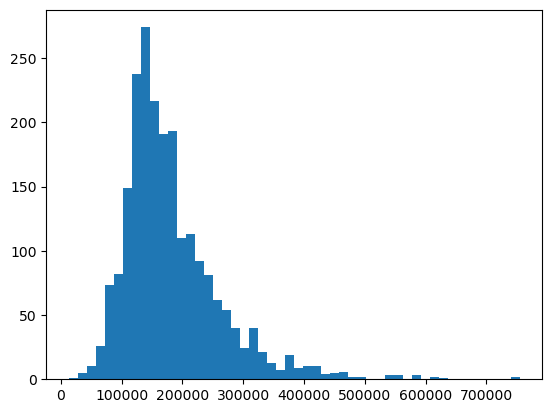

In [328]:
target_var = 'SalePrice'
y = train[target_var]
plt.hist(y, bins=50);

In [329]:
try: test[target_var]
except: print('No target variable in test set')

No target variable in test set


### Demonstration of a simple model

In [330]:
grOutliers = []
for val in train['Gr Liv Area']:
    if val > 4550:
        grOutliers.append(val)

for outliers in grOutliers:
    train.drop(train[train['Gr Liv Area'] == outliers].index, inplace = True)

In [331]:
X = train.drop(target_var, axis=1)
y = train[target_var]

<function matplotlib.pyplot.show(close=None, block=None)>

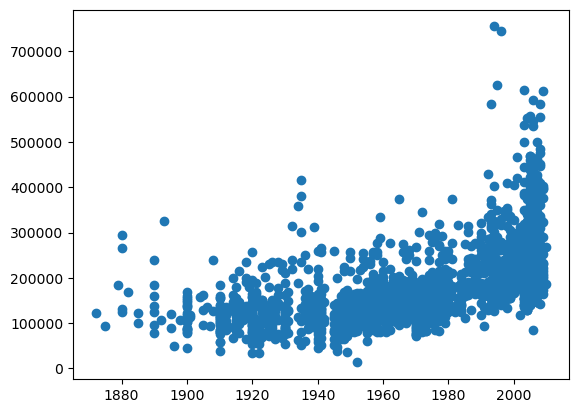

In [332]:
plt.scatter(X['Year Built'], y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

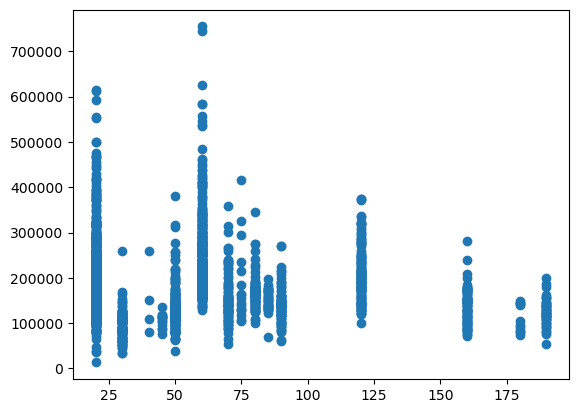

In [333]:
plt.scatter(X['MS SubClass'], y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

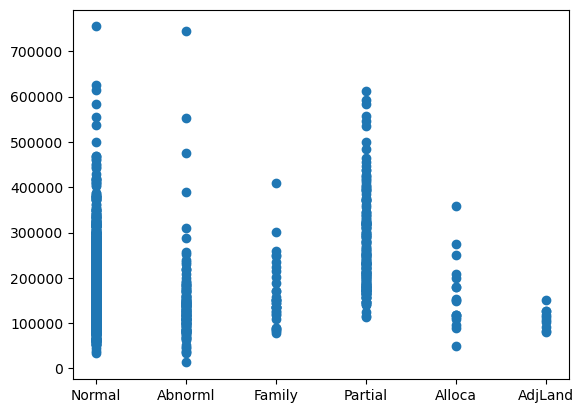

In [334]:
plt.scatter(X['Sale Condition'], y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

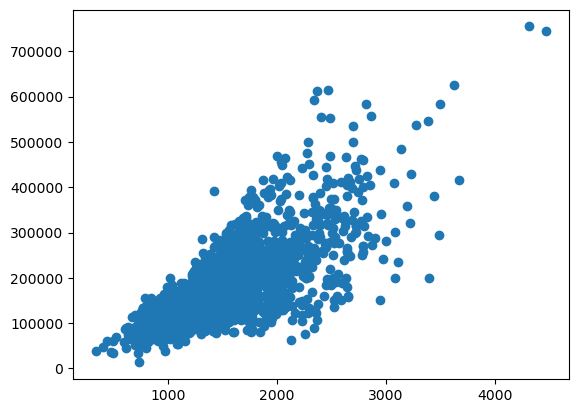

In [335]:
plt.scatter(X['Gr Liv Area'], y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

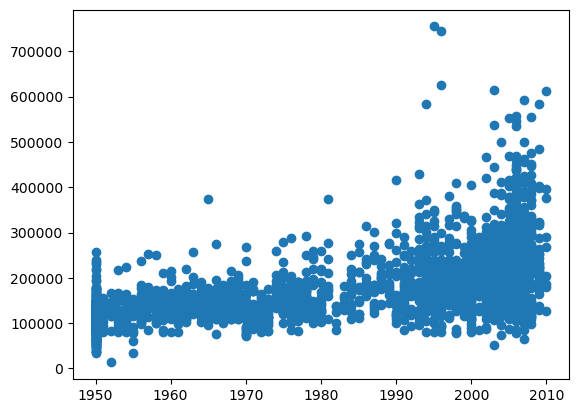

In [336]:
plt.scatter(X['Year Remod/Add'], y)
plt.show

In [337]:
X.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [338]:
X['Year Remod/Add'].value_counts()

1950    262
2006    163
2007    130
2005    109
2004     84
       ... 
1951     10
1981      9
1983      9
2010      9
1982      5
Name: Year Remod/Add, Length: 61, dtype: int64

In [339]:
X['Gr Liv Area'].value_counts()

864     27
1456    18
1092    18
1040    16
1200    14
        ..
967      1
1385     1
1607     1
1674     1
2088     1
Name: Gr Liv Area, Length: 1115, dtype: int64

In [340]:
X['Overall Qual'].value_counts()

5     611
6     540
7     460
8     268
4     162
9      82
3      33
10     24
2      10
1       4
Name: Overall Qual, dtype: int64

In [341]:
X['Sale Condition'].value_counts()

Normal     1809
Partial     187
Abnorml     135
Family       35
Alloca       18
AdjLand      10
Name: Sale Condition, dtype: int64

In [342]:
X['Overall Cond'].value_counts()

5    1254
6     392
7     289
8     103
4      72
3      40
9      32
2       7
1       5
Name: Overall Cond, dtype: int64

In [343]:
cols = ['Year Remod/Add', 'Gr Liv Area', 'Overall Qual', 'Sale Condition', 'MS SubClass', 'Bldg Type', '1st Flr SF']
X = X[cols]

tmp = pd.get_dummies(X['Sale Condition'], drop_first=True)
X = pd.concat([X, tmp], axis=1)
X = X.drop('Sale Condition', axis=1)
tmp2 = pd.get_dummies(X['Year Remod/Add'], drop_first=True)
X = pd.concat([X, tmp2], axis=1)
X = X.drop('Year Remod/Add', axis=1)
tmp3 = pd.get_dummies(X['Bldg Type'], drop_first=True)
X = pd.concat([X, tmp3], axis=1)
X = X.drop('Bldg Type', axis=1)

X.head(5)

,Gr Liv Area,Overall Qual,MS SubClass,1st Flr SF,AdjLand,Alloca,Family,Normal,Partial,1951,...,2005,2006,2007,2008,2009,2010,2fmCon,Duplex,Twnhs,TwnhsE
0,1218,7,20,1218,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2196,7,20,2196,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1344,6,20,1344,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1456,9,120,1456,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1374,7,80,744,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [363]:
Xtr, Xval, ytr, yval = train_test_split(X, y, random_state=22, test_size=0.2)

Xtr.shape, Xval.shape, ytr.shape, yval.shape

((1755, 73), (439, 73), (1755,), (439,))

In [364]:
lr = LinearRegression()
lr.fit(Xtr, ytr)
score_tr = lr.score(Xtr, ytr)
score_val = lr.score(Xval, yval)

score_tr, score_val

C:\Users\TestAccount\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\TestAccount\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\TestAccount\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


(0.8190964142567189, 0.832536408692435)

In [365]:
r2_score(yval, lr.predict(Xval))

C:\Users\TestAccount\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.832536408692435

### Submission

In [347]:
test = pd.read_csv('data/test.csv')

In [348]:
Xtest = test

In [349]:
# repeat the pre-processing steps above
cols = ['Year Remod/Add', 'Gr Liv Area', 'Overall Qual', 'Sale Condition', 'MS SubClass', 'Bldg Type', '1st Flr SF']
Xtest = Xtest[cols]

tmp = pd.get_dummies(Xtest['Sale Condition'], drop_first=True)
Xtest = pd.concat([Xtest, tmp], axis=1)
Xtest = Xtest.drop('Sale Condition', axis=1)
tmp2 = pd.get_dummies(Xtest['Year Remod/Add'], drop_first=True)
Xtest = pd.concat([Xtest, tmp2], axis=1)
Xtest = Xtest.drop('Year Remod/Add', axis=1)
tmp3 = pd.get_dummies(Xtest['Bldg Type'], drop_first=True)
Xtest = pd.concat([Xtest, tmp3], axis=1)
Xtest = Xtest.drop('Bldg Type', axis=1)
Xtest.head(5)

,Gr Liv Area,Overall Qual,MS SubClass,1st Flr SF,AdjLand,Alloca,Family,Normal,Partial,1951,...,2005,2006,2007,2008,2009,2010,2fmCon,Duplex,Twnhs,TwnhsE
0,990,4,20,990,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2068,7,75,1160,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1368,7,120,1368,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,1358,7,120,1358,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,1837,6,60,941,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [350]:
feature_difference = set(X) - set(Xtest)

feature_difference_df = pd.DataFrame(data=np.zeros((test.shape[0], len(feature_difference))),
                                     columns=list(feature_difference))\

Xtest = Xtest.join(feature_difference_df)

In [351]:
Xtest.head(5)

,Gr Liv Area,Overall Qual,MS SubClass,1st Flr SF,AdjLand,Alloca,Family,Normal,Partial,1951,...,2005,2006,2007,2008,2009,2010,2fmCon,Duplex,Twnhs,TwnhsE
0,990,4,20,990,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2068,7,75,1160,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1368,7,120,1368,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,1358,7,120,1358,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,1837,6,60,941,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [352]:
preds = lr.predict(Xtest)
preds[:5]

C:\Users\TestAccount\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([111395.0786001 , 244399.07891469, 227585.91843552, 260497.17802421,
       189407.61973688])

In [353]:
len(preds)

733

In [354]:
min(preds), max(preds)

(-6810.116973859127, 423242.41110456333)

In [355]:
# for num in range(len(preds)):
#     if preds[num] < 0:
#         preds[num] = 0

In [356]:
def resolveNeg(num):
    if num < 0:
        return 0
    else:
        return num

preds = pd.Series(preds).map(resolveNeg)

In [357]:
min(preds), max(preds)

(0.0, 423242.41110456333)

In [358]:
# one number per line, in the same order as the test.csv
s_preds = "\n".join([str(e) for e in preds.tolist()])

In [359]:
fn = 'Overfitting-Underdogs.csv'
with open(fn, 'w') as f:
    f.write(s_preds)

In [ ]:
# check out that file, should be next ot this notebook